# Code used to obtain Figure 1b and 1c

## Figure 1b
Precipitation time series monthly spaghetti plot with 2021, 2022 and 2023 highlighted

In [37]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [38]:
path = "C:/Users/user/OneDrive - Politecnico di Milano/hydrogeo-modelling/Dati/ARPA Lombardia"

In [44]:
prec = pd.read_csv(os.path.join(path, "lambrate", "RW_20240311171811_605218", "RW_20240311171820_605218_2006_4.csv"), index_col = "Data-Ora", parse_dates = True)
prec = prec["Valore Cumulata Giornaliero"].copy()
prec[prec == -999] = np.nan
prec = prec.resample("1MS").sum().dropna()
prec = prec.to_frame("prec")
prec["month"] = prec.index.month
monthly_prec = prec.groupby("month").mean()
monthly_prec.reset_index(inplace = True)

In [45]:
#add 2022 data
p22 = prec.loc[(prec.index >= "2021-01-01") & (prec.index < "2023-01-01"), :].groupby("month").mean().reset_index().drop("month", axis = 1)
p22.columns = ["p2022"]
mprec22 = pd.concat([monthly_prec, p22], axis= 1)
mprec22.drop("month", axis = 1, inplace = True)

In [46]:
temp = pd.read_csv(os.path.join(path, "idrometeo", "Temperatura-monthly-v2.csv"), index_col = "Data", parse_dates=True)
temp = temp["2001"].dropna().copy()
temp = temp.to_frame("temp")
temp["month"] = temp.index.month
monthly_temp = temp.groupby("month").mean()
monthly_temp.reset_index(inplace = True)

In [51]:
mtemp22 = temp.loc[(temp.index >= "2021-01-01") & (temp.index < "2023-01-01"), :].groupby("month").mean().reset_index().drop("month", axis = 1)

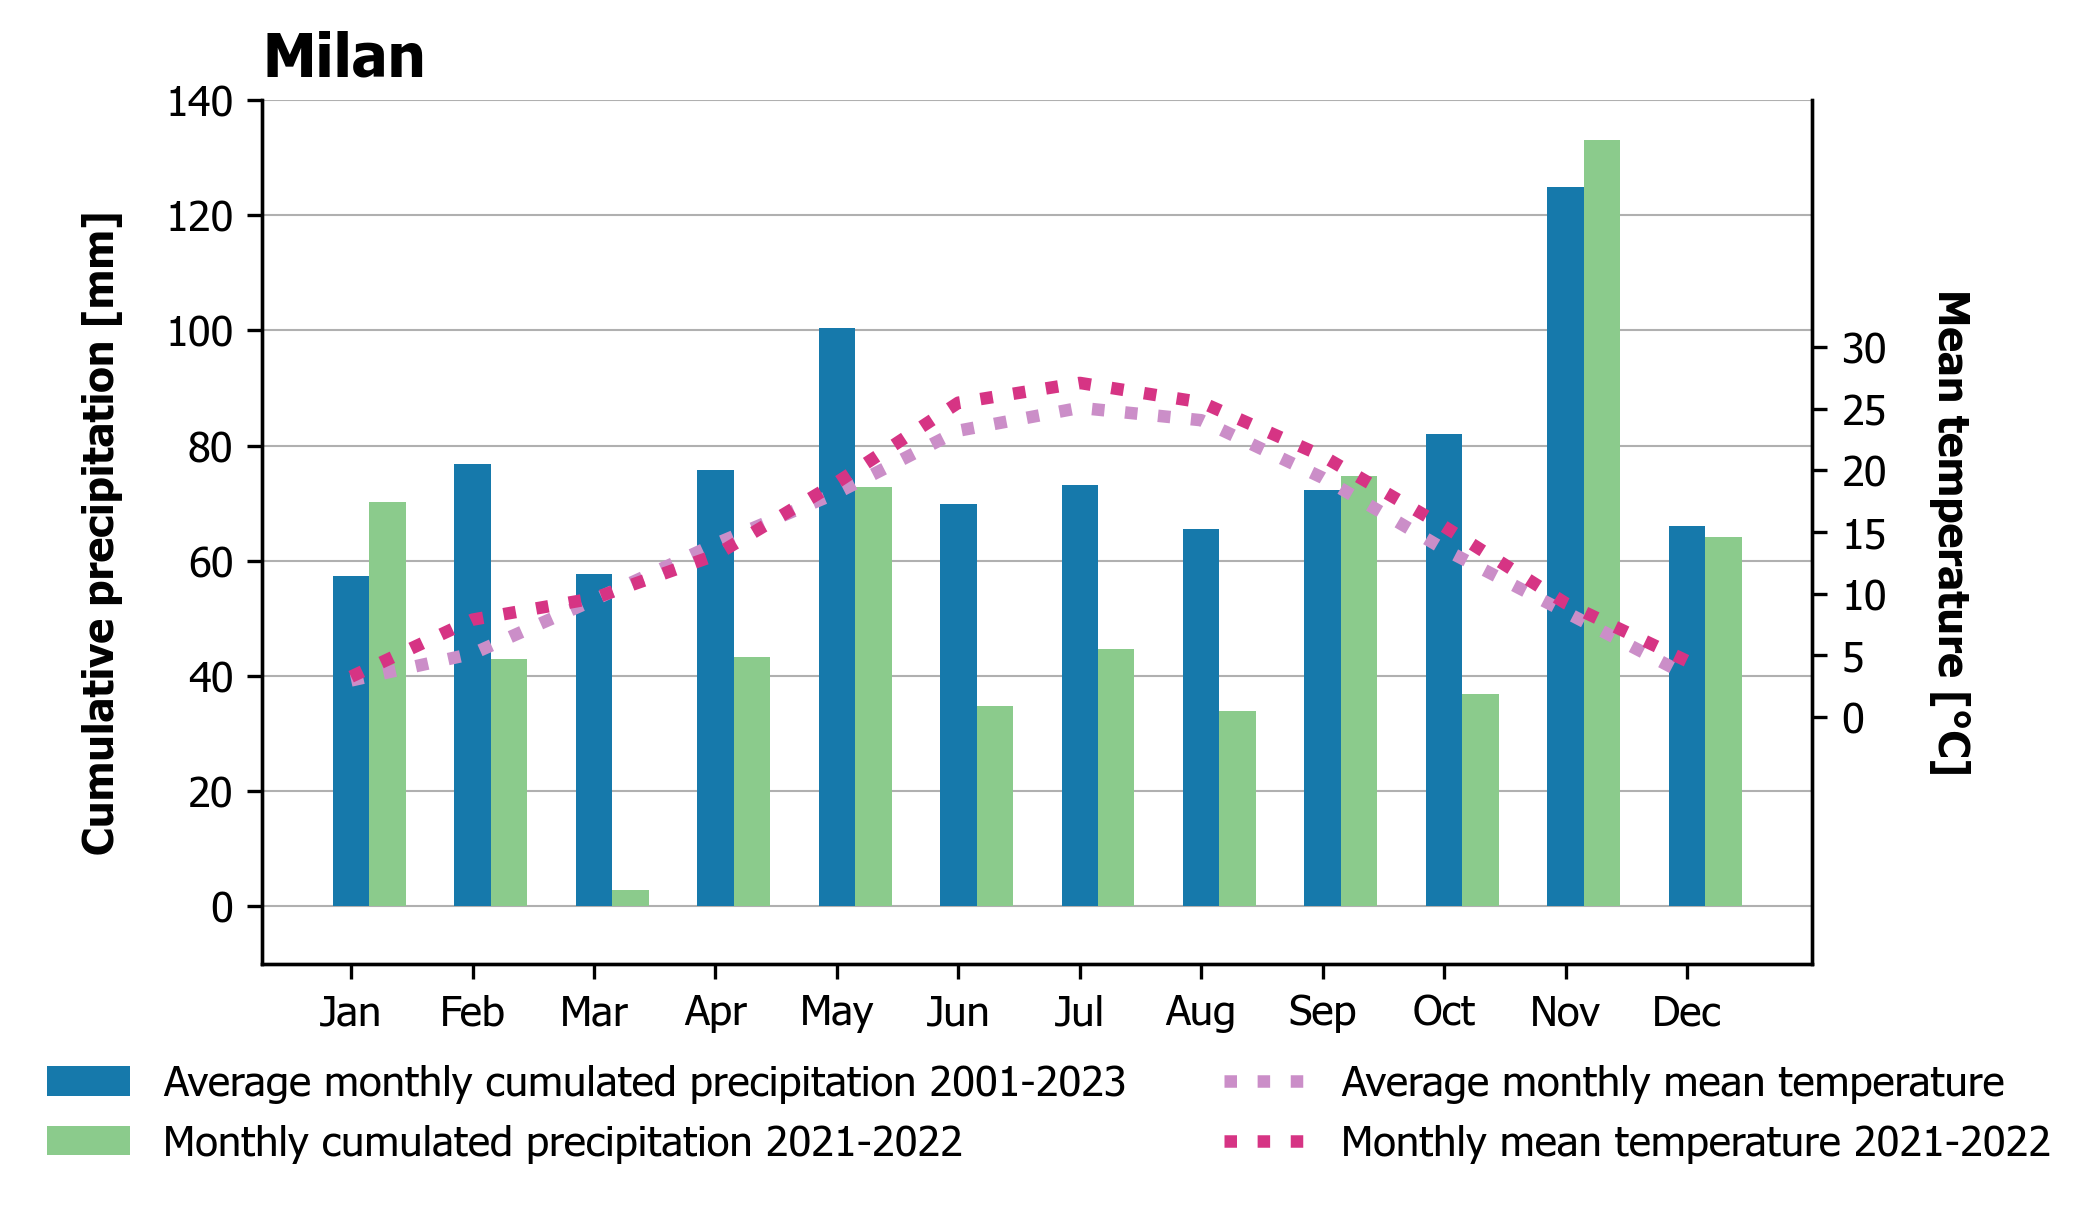

In [55]:
font = {'fontname': 'tahoma'}
colors = {"prec": "#1679AB",
          "p2022": "#8BCB8C", #"#40679E",
          "temp": "#FF9BD2",
          "temp22": "#D63484"
        }
palette = ['#2D8051', '#CB8EC8', '#1679AB', '#8BCB8C']
monthdict = {1: "Jan",
             2: "Feb",
             3: "Mar",
             4: "Apr",
             5: "May",
             6: "Jun",
             7: "Jul",
             8: "Aug",
             9: "Sep",
             10: "Oct",
             11: "Nov",
             12: "Dec"
             }
legenddict = {"prec": "Average monthly cumulated precipitation 2001-2023",
              "p2022": "Monthly cumulated precipitation 2021-2022"}
labels = [monthdict[x] for x in monthly_temp.month]

x = np.arange(0, 12)  #the label locations
width = 0.3           #the width of the bars
multiplier = 0

_, ax = plt.subplots(figsize = cm2inch(16.93, 9.5), dpi = 300)
ax2 = ax.twinx()

for attribute, measurement in mprec22.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label = legenddict[attribute],
                   color = colors[attribute], zorder=3) 
    multiplier += 1

ax2.plot(monthly_temp["temp"], ":", linewidth = 3, color = palette[1],
         label = "Average monthly mean temperature")
ax2.plot(mtemp22["temp"], ":", linewidth = 3, color = colors["temp22"],
         label = "Monthly mean temperature 2021-2022")

ax.set_ylim(-10, 140)
ax2.set_ylim(-20, 50)
ax.set_ylabel('Cumulative precipitation [mm]', labelpad = 10, weight = 'bold')
ax2.set_ylabel('Mean temperature [°C]', rotation = 270, labelpad = 20, weight = 'bold')
ax.set_xlabel("")
ax2.set_xlabel("")
ax.set_xticks(x, labels = labels)
ax2.set_yticks(np.arange(0, 35, 5))

ax.grid(axis = 'y', linewidth = 0.5, zorder=0)
ax.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)

leg = ax.legend(loc = (-0.15, -0.25))
leg.get_frame().set_linewidth(0.0)
leg2 = ax2.legend(loc = (0.61, -0.25))
leg2.get_frame().set_linewidth(0.0)

plt.title("Milan", loc = 'left', weight = 'bold', size = 'x-large')
plt.rcParams["font.family"] = font["fontname"]
plt.rcParams["font.size"] = 10
plt.setp(ax.get_xticklabels(), rotation = 0, ha = "center", rotation_mode = "anchor")
plt.savefig(os.path.join(os.getcwd(), 'images', 'prec_lambrate_barplot.png'), format = 'png', bbox_inches='tight')
plt.show()

## Figure 1c

In [1]:
#Setup
import calendar
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings

cwd = "C:/Users/user/OneDrive - Politecnico di Milano/hydrogeo-modelling/Dati"

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
#Load data
metalvci = pd.read_csv(os.path.join(cwd, 'database_flowpath23', 'db-sel-clean', 'metalvci.csv'))
metalvci['IdSensore'] = [f"{x}" for x in metalvci['IdSensore']]
metalvci.set_index('IdSensore', inplace=True)
tslvci = pd.read_csv(os.path.join(cwd, "ARPA Lombardia", "idrometeo", "livello-idrometrico-daily-v2.csv"), index_col = 'Data', parse_dates = True)

In [3]:
#Ticino river level at Vigevano (PV)
tic = tslvci.loc[tslvci.index[tslvci['8153']<200], '8153'].to_frame().copy()
tic['month'] = tic.index.month
tic['year'] = tic.index.year
tic['dayofyear'] = tic.index.day_of_year
tic['8153'] = tic['8153']/100

In [16]:
ticm = tic.loc[:, ~tic.columns.isin(['year', 'dayofyear'])].groupby(tic.month)['8153'].mean().to_frame().reset_index()

In [18]:
ticm['8153'] = (ticm['8153'] - ticm['8153'].min())/(ticm['8153'].max()-ticm['8153'].min())

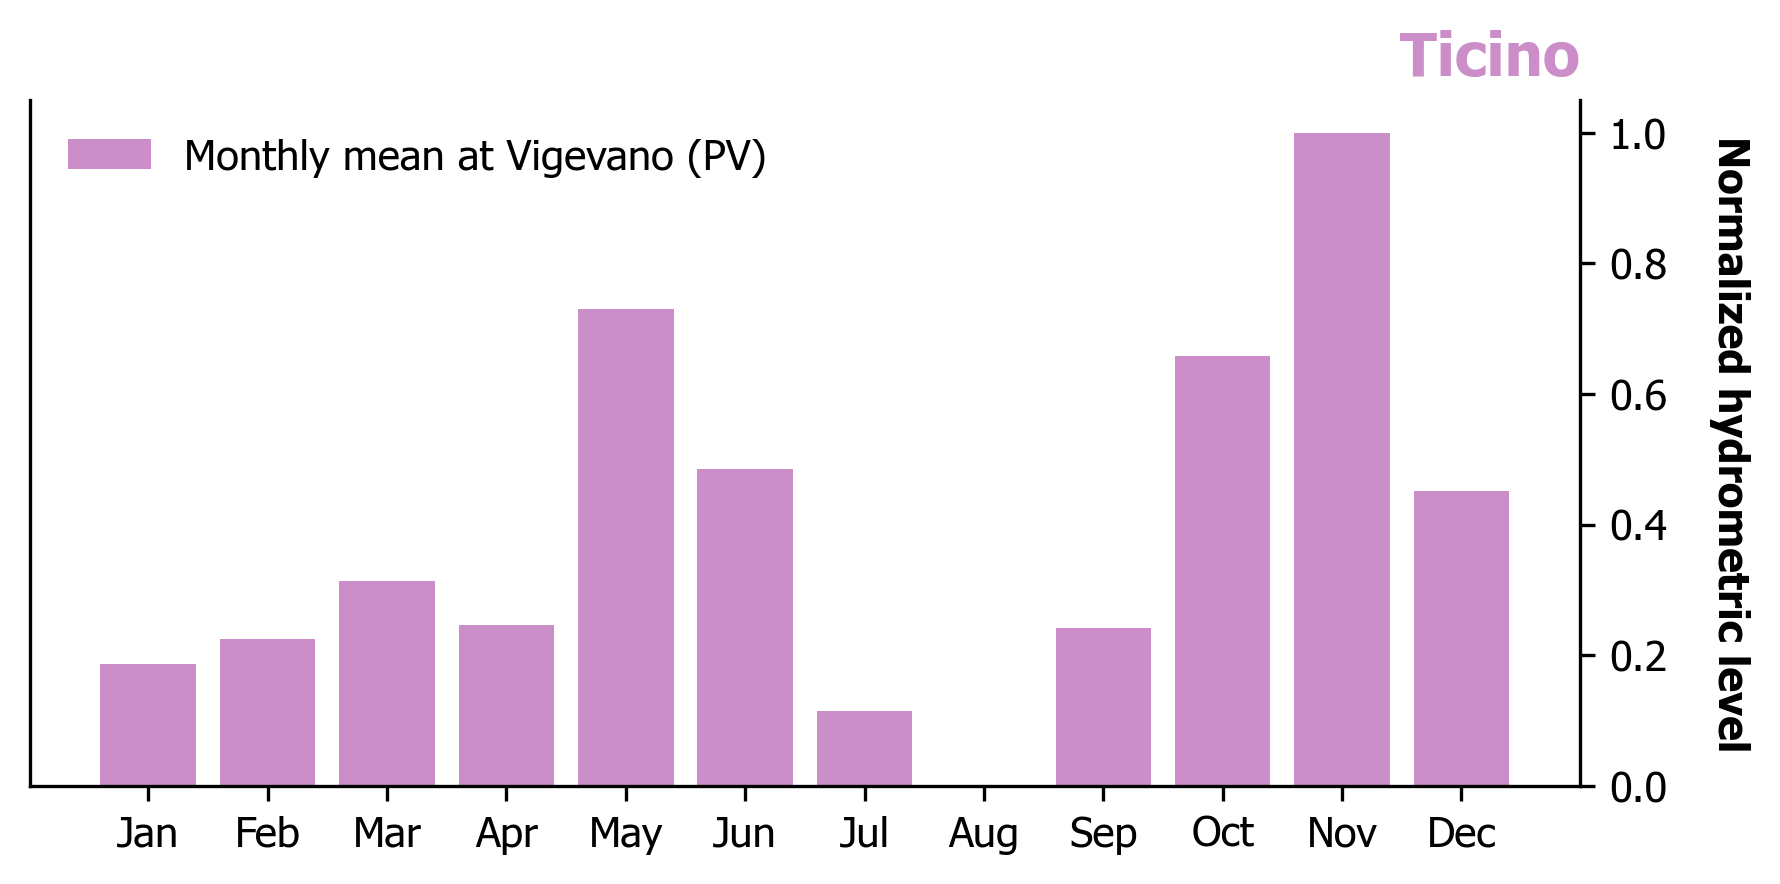

In [22]:
font = {'fontname': 'tahoma'}
colors = {"prec": "#1B3C73",
           "temp": "#FF407D"}
palette = ['#2D8051', '#CB8EC8', '#1679AB', '#8BCB8C']
monthdict = {1: "Jan",
             2: "Feb",
             3: "Mar",
             4: "Apr",
             5: "May",
             6: "Jun",
             7: "Jul",
             8: "Aug",
             9: "Sep",
             10: "Oct",
             11: "Nov",
             12: "Dec"
             }
labels = [monthdict[x] for x in ticm.month]

_, ax = plt.subplots(figsize = cm2inch(16.93, 7.54), dpi = 300)

ax.bar(x = ticm.index, height = ticm['8153'], color = palette[1],
       label = "Monthly mean at Vigevano (PV)")

# ax.set_ylim(-1.3, -0.4)
ax.set_ylabel('Normalized hydrometric level', weight ='bold', rotation = 270, labelpad=20)
ax.set_xlabel("")
ax.set_xticks(np.arange(0, 12), labels = labels)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

ax.spines.top.set_visible(False)

leg = ax.legend(loc = 2)
leg.get_frame().set_linewidth(0.0)

# plt.gca().invert_yaxis()
plt.title("Ticino", loc = 'right', weight = 'bold', color = palette[1], size = 'x-large')
plt.rcParams["font.family"] = font["fontname"]
plt.rcParams["font.size"] = 10
plt.setp(ax.get_xticklabels(), rotation = 0, ha = "center", rotation_mode = "anchor")
plt.savefig(os.path.join(os.getcwd(), 'images', 'ticino_barplot_norm.png'), format = 'png', bbox_inches='tight')
plt.show()